In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [51]:
df=pd.read_csv(r'C:\Users\raosa\Desktop\eda\files\income.csv')

In [52]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [53]:
df.rename(columns={'Income($)':'Income'},inplace=True)

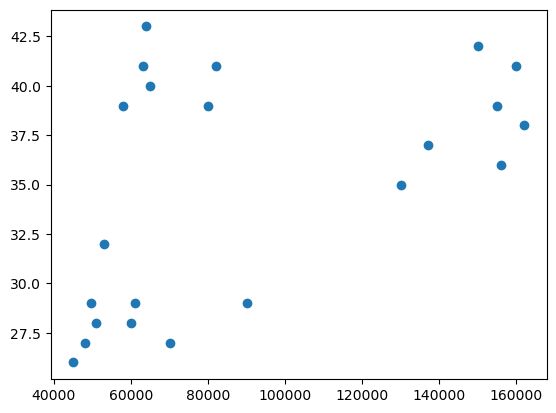

In [54]:
plt.scatter('Income','Age',data=df)

scaler.fit(df[['Income']])
'''using df['Income'] shows error expected 2d array 
instead of 1d array'''
;

In [55]:
from sklearn.cluster import KMeans

In [56]:
km=KMeans(n_clusters=3)

In [57]:
km.fit(df[['Age','Income']])

KMeans(n_clusters=3)

In [58]:
y_pred=km.predict(df[['Age','Income']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [59]:
# or both together
ypred=km.fit_predict(df[['Age','Income']])
ypred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [60]:
df['Cluster']=ypred
df.head()

,Name,Age,Income,Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


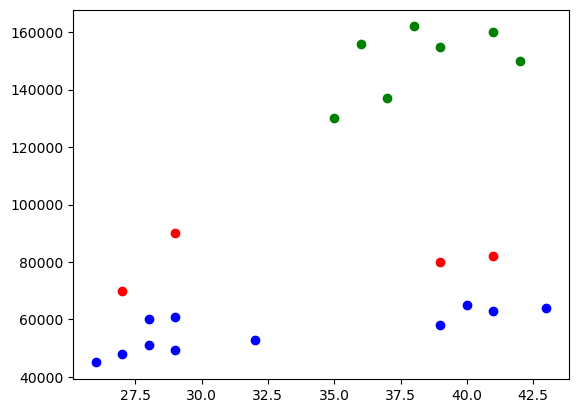

In [64]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
plt.scatter(df1.Age,df1.Income,color='red')
plt.scatter(df2.Age,df2.Income,color='green')
plt.scatter(df3.Age,df3.Income,color='blue')

In [65]:
# the error is cause of the scaling to make it error free 

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [73]:
scaler.fit(df[['Income']]) #wihout 2 brackets it will show error 
#requires 2d array instead of 1d array 
df['NewIncome']=scaler.transform(df[['Income']])
df.head()

,Name,Age,Income,Cluster,new,NewIncome
0,Rob,27,70000,0,0.213675,0.213675
1,Michael,29,90000,0,0.384615,0.384615
2,Mohan,29,61000,2,0.136752,0.136752
3,Ismail,28,60000,2,0.128205,0.128205
4,Kory,42,150000,1,0.897436,0.897436


In [85]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','NewIncome']])


In [86]:
df['Cluster2']=y_pred
df.head()

,Name,Age,Income,Cluster,new,NewIncome,Cluster2
0,Rob,27,70000,0,0.213675,0.213675,1
1,Michael,29,90000,0,0.384615,0.384615,1
2,Mohan,29,61000,2,0.136752,0.136752,1
3,Ismail,28,60000,2,0.128205,0.128205,1
4,Kory,42,150000,1,0.897436,0.897436,2


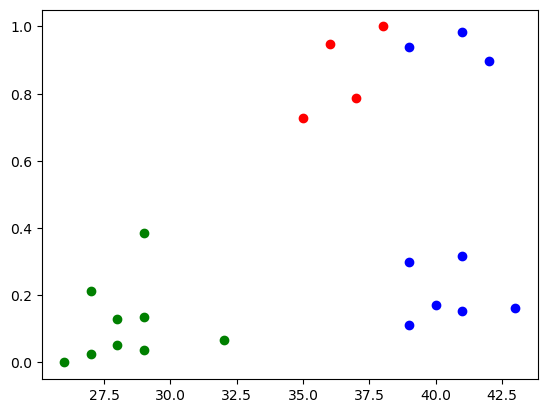

In [87]:
df1=df[df.Cluster2==0]
df2=df[df.Cluster2==1]
df3=df[df.Cluster2==2]
plt.scatter(df1.Age,df1.NewIncome,color='red')
plt.scatter(df2.Age,df2.NewIncome,color='green')
plt.scatter(df3.Age,df3.NewIncome,color='blue')